In [1]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |   py36h9f0ad1d_1         149 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    openssl-1.1.1e             |       h516909a_0         2.1 MB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1

In [3]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [4]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [5]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [6]:
neighborhoods_data = newyork_data['features']

In [7]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [8]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [9]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [10]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [11]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [12]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [13]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [14]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [15]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [16]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


In [17]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

In [18]:
CLIENT_ID = 'AEGCTKETRUB4NUR1EI2MOPVTCXYMG1YW03U05KHSRMB3A14K' # your Foursquare ID
CLIENT_SECRET = 'MHMUS4WJWHTM5H4OLZLL3OBF2WTD34TQSJIKG1UHUE0TITUJ' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: AEGCTKETRUB4NUR1EI2MOPVTCXYMG1YW03U05KHSRMB3A14K
CLIENT_SECRET:MHMUS4WJWHTM5H4OLZLL3OBF2WTD34TQSJIKG1UHUE0TITUJ


In [19]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


In [20]:
manhattan_data.loc[0, 'Neighborhood']

'Marble Hill'

In [21]:
neighborhood_latitude = manhattan_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = manhattan_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = manhattan_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Marble Hill are 40.87655077879964, -73.91065965862981.


Now, let's get the top 100 venues that are in Marble Hill within a radius of 500 meters.

In [22]:
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=AEGCTKETRUB4NUR1EI2MOPVTCXYMG1YW03U05KHSRMB3A14K&client_secret=MHMUS4WJWHTM5H4OLZLL3OBF2WTD34TQSJIKG1UHUE0TITUJ&v=20180604&ll=40.87655077879964,-73.91065965862981&radius=500&limit=100'

In [23]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e7da838dd0f850028d40083'},
 'response': {'headerLocation': 'Marble Hill',
  'headerFullLocation': 'Marble Hill, New York',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 24,
  'suggestedBounds': {'ne': {'lat': 40.88105078329964,
    'lng': -73.90471933917806},
   'sw': {'lat': 40.87205077429964, 'lng': -73.91659997808156}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b4429abf964a52037f225e3',
       'name': "Arturo's",
       'location': {'address': '5198 Broadway',
        'crossStreet': 'at 225th St.',
        'lat': 40.87441177110231,
        'lng': -73.91027100981574,
        'labeledLatLngs': [{'label': 'display',
          'lat': 40.87441177110231,
          'lng': -73.91027100981574}],
        'distance'

In [24]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [25]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Arturo's,Pizza Place,40.874412,-73.910271
1,Bikram Yoga,Yoga Studio,40.876844,-73.906204
2,Tibbett Diner,Diner,40.880404,-73.908937
3,Dunkin',Donut Shop,40.877136,-73.906666
4,Starbucks,Coffee Shop,40.877531,-73.905582


In [26]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

24 venues were returned by Foursquare.


Let's create a function to repeat the same process to all the neighborhoods in Manhattan

In [27]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
             # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now write the code to run the above function on each neighborhood and create a new dataframe called manhattan_venues.

In [28]:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


Let's check the size of the resulting dataframe

In [29]:
print(manhattan_venues.shape)
manhattan_venues.head()

(3310, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop
4,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop


In [30]:
manhattan_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Battery Park City,92,92,92,92,92,92
Carnegie Hill,100,100,100,100,100,100
Central Harlem,43,43,43,43,43,43
Chelsea,100,100,100,100,100,100
Chinatown,100,100,100,100,100,100
Civic Center,100,100,100,100,100,100
Clinton,100,100,100,100,100,100
East Harlem,41,41,41,41,41,41
East Village,100,100,100,100,100,100


In [31]:
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

There are 343 uniques categories.


Analyze Each Neighborhood

In [32]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Caucasian Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Gym,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Paella Restaurant,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pop-Up Shop,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon /

In [33]:
manhattan_onehot.shape

(3310, 344)

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [34]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Caucasian Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Gym,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Paella Restaurant,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pop-Up Shop,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon /

In [35]:
manhattan_grouped.shape

(40, 344)

Let's print each neighborhood along with the top 5 most common venues

In [36]:
num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
           venue  freq
0           Park  0.08
1    Coffee Shop  0.07
2          Hotel  0.05
3  Shopping Mall  0.03
4  Women's Store  0.03


----Carnegie Hill----
                  venue  freq
0           Pizza Place  0.06
1           Coffee Shop  0.05
2                  Café  0.05
3           Yoga Studio  0.03
4  Gym / Fitness Center  0.03


----Central Harlem----
                 venue  freq
0   African Restaurant  0.07
1                  Bar  0.05
2   Chinese Restaurant  0.05
3  American Restaurant  0.05
4    French Restaurant  0.05


----Chelsea----
                venue  freq
0         Coffee Shop  0.07
1              Bakery  0.05
2  Italian Restaurant  0.05
3           Wine Shop  0.03
4               Hotel  0.03


----Chinatown----
                   venue  freq
0     Chinese Restaurant  0.09
1           Cocktail Bar  0.05
2    American Restaurant  0.04
3  Vietnamese Restaurant  0.04
4           Optical Shop  0.03


----Civic Center----
                  

#### Let's put that into a pandas dataframe

First, let's write a function to sort the venues in descending order.

In [37]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [38]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Coffee Shop,Hotel,Women's Store,Clothing Store,Shopping Mall,Memorial Site,Gym,Wine Shop,Playground
1,Carnegie Hill,Pizza Place,Café,Coffee Shop,Yoga Studio,Gym,Bookstore,Cosmetics Shop,French Restaurant,Grocery Store,Bakery
2,Central Harlem,African Restaurant,Bar,American Restaurant,Chinese Restaurant,French Restaurant,Seafood Restaurant,Tapas Restaurant,Southern / Soul Food Restaurant,Dessert Shop,Beer Bar
3,Chelsea,Coffee Shop,Italian Restaurant,Bakery,American Restaurant,Ice Cream Shop,Hotel,Wine Shop,Bookstore,Seafood Restaurant,Sushi Restaurant
4,Chinatown,Chinese Restaurant,Cocktail Bar,American Restaurant,Vietnamese Restaurant,Spa,Optical Shop,Salon / Barbershop,Hotpot Restaurant,Bakery,Asian Restaurant


## Find Asian restaurants in the top 10 venues for neighborhoods

In [39]:
chinese = manhattan_merged[(manhattan_merged['1st Most Common Venue']=='Chinese Restaurant') | (manhattan_merged['2nd Most Common Venue']=='Chinese Restaurant')| (manhattan_merged['3rd Most Common Venue']=='Chinese Restaurant')| (manhattan_merged['4th Most Common Venue']=='Chinese Restaurant')| (manhattan_merged['5th Most Common Venue']=='Chinese Restaurant')| (manhattan_merged['6th Most Common Venue']=='Chinese Restaurant')| (manhattan_merged['7th Most Common Venue']=='Chinese Restaurant')| (manhattan_merged['8th Most Common Venue']=='Chinese Restaurant')| (manhattan_merged['9th Most Common Venue']=='Chinese Restaurant')|(manhattan_merged['10th Most Common Venue']=='Chinese Restaurant')]
chinese

NameError: name 'manhattan_merged' is not defined

In [40]:
# set number of clusters
kclusters = 5

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 3, 3, 3, 0, 3, 3, 2, 0, 3], dtype=int32)

In [41]:
ramen = manhattan_merged[(manhattan_merged['1st Most Common Venue']=='Ramen Restaurant') | (manhattan_merged['2nd Most Common Venue']=='Ramen Restaurant')| (manhattan_merged['3rd Most Common Venue']=='Ramen Restaurant')| (manhattan_merged['4th Most Common Venue']=='Ramen Restaurant')| (manhattan_merged['5th Most Common Venue']=='Ramen Restaurant')| (manhattan_merged['6th Most Common Venue']=='Ramen Restaurant')| (manhattan_merged['7th Most Common Venue']=='Ramen Restaurant')| (manhattan_merged['8th Most Common Venue']=='Ramen Restaurant')| (manhattan_merged['9th Most Common Venue']=='Ramen Restaurant')|(manhattan_merged['10th Most Common Venue']=='Ramen Restaurant')]
ramen

NameError: name 'manhattan_merged' is not defined

In [120]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = manhattan_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,4,Sandwich Place,Gym,American Restaurant,Coffee Shop,Yoga Studio,Deli / Bodega,Steakhouse,Shopping Mall,Seafood Restaurant,Pizza Place
1,Manhattan,Chinatown,40.715618,-73.994279,1,Chinese Restaurant,Cocktail Bar,American Restaurant,Vietnamese Restaurant,Salon / Barbershop,Bakery,Optical Shop,Spa,Hotpot Restaurant,Dumpling Restaurant
2,Manhattan,Washington Heights,40.851903,-73.936900,0,Café,Bakery,Grocery Store,Chinese Restaurant,Mobile Phone Shop,Spanish Restaurant,Clothing Store,Park,Deli / Bodega,Supplement Shop
3,Manhattan,Inwood,40.867684,-73.921210,0,Mexican Restaurant,Café,Pizza Place,Lounge,Restaurant,Deli / Bodega,Frozen Yogurt Shop,Chinese Restaurant,Park,Bakery
4,Manhattan,Hamilton Heights,40.823604,-73.949688,0,Pizza Place,Deli / Bodega,Coffee Shop,Mexican Restaurant,Café,Yoga Studio,School,Bakery,Caribbean Restaurant,Chinese Restaurant


In [129]:
vietnamese = manhattan_merged[(manhattan_merged['1st Most Common Venue']=='Vietnamese Restaurant') | (manhattan_merged['2nd Most Common Venue']=='Vietnamese Restaurant')| (manhattan_merged['3rd Most Common Venue']=='Vietnamese Restaurant')| (manhattan_merged['4th Most Common Venue']=='Vietnamese Restaurant')| (manhattan_merged['5th Most Common Venue']=='Vietnamese Restaurant')| (manhattan_merged['6th Most Common Venue']=='Vietnamese Restaurant')| (manhattan_merged['7th Most Common Venue']=='Vietnamese Restaurant')| (manhattan_merged['8th Most Common Venue']=='Vietnamese Restaurant')| (manhattan_merged['9th Most Common Venue']=='Vietnamese Restaurant')|(manhattan_merged['10th Most Common Venue']=='Vietnamese Restaurant')]
vietnamese

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Manhattan,Chinatown,40.715618,-73.994279,1,Chinese Restaurant,Cocktail Bar,American Restaurant,Vietnamese Restaurant,Salon / Barbershop,Bakery,Optical Shop,Spa,Hotpot Restaurant,Dumpling Restaurant


In [121]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [130]:
thai = manhattan_merged[(manhattan_merged['1st Most Common Venue']=='Thai Restaurant') | (manhattan_merged['2nd Most Common Venue']=='Thai Restaurant')| (manhattan_merged['3rd Most Common Venue']=='Thai Restaurant')| (manhattan_merged['4th Most Common Venue']=='Thai Restaurant')| (manhattan_merged['5th Most Common Venue']=='Thai Restaurant')| (manhattan_merged['6th Most Common Venue']=='Thai Restaurant')| (manhattan_merged['7th Most Common Venue']=='Thai Restaurant')| (manhattan_merged['8th Most Common Venue']=='Thai Restaurant')| (manhattan_merged['9th Most Common Venue']=='Thai Restaurant')|(manhattan_merged['10th Most Common Venue']=='Thai Restaurant')]
thai

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Manhattan,East Harlem,40.792249,-73.944182,0,Mexican Restaurant,Bakery,Thai Restaurant,Deli / Bodega,Pizza Place,Latin American Restaurant,Spa,French Restaurant,Steakhouse,Street Art
10,Manhattan,Lenox Hill,40.768113,-73.958860,2,Italian Restaurant,Coffee Shop,Pizza Place,Sushi Restaurant,Cocktail Bar,Burger Joint,Gym,Café,Gym / Fitness Center,Thai Restaurant
25,Manhattan,Manhattan Valley,40.797307,-73.964286,1,Bar,Coffee Shop,Pizza Place,Indian Restaurant,Yoga Studio,Mexican Restaurant,Playground,Thai Restaurant,Furniture / Home Store,Malay Restaurant
39,Manhattan,Hudson Yards,40.756658,-74.000111,2,American Restaurant,Coffee Shop,Hotel,Gym / Fitness Center,Italian Restaurant,Café,Thai Restaurant,Spanish Restaurant,Bar,Restaurant


In [131]:
korean = manhattan_merged[(manhattan_merged['1st Most Common Venue']=='Korean Restaurant') | (manhattan_merged['2nd Most Common Venue']=='Korean Restaurant')| (manhattan_merged['3rd Most Common Venue']=='Korean Restaurant')| (manhattan_merged['4th Most Common Venue']=='Korean Restaurant')| (manhattan_merged['5th Most Common Venue']=='Korean Restaurant')| (manhattan_merged['6th Most Common Venue']=='Korean Restaurant')| (manhattan_merged['7th Most Common Venue']=='Korean Restaurant')| (manhattan_merged['8th Most Common Venue']=='Korean Restaurant')| (manhattan_merged['9th Most Common Venue']=='Korean Restaurant')|(manhattan_merged['10th Most Common Venue']=='Korean Restaurant')]
korean

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Manhattan,East Village,40.727847,-73.982226,1,Bar,Ice Cream Shop,Wine Bar,Pizza Place,Mexican Restaurant,Cocktail Bar,Chinese Restaurant,Korean Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant
33,Manhattan,Midtown South,40.748510,-73.988713,1,Korean Restaurant,Hotel,Hotel Bar,Japanese Restaurant,Dessert Shop,Cosmetics Shop,American Restaurant,Gym / Fitness Center,Coffee Shop,Italian Restaurant


Cluster 1

In [132]:
japanese = manhattan_merged[(manhattan_merged['1st Most Common Venue']=='Japanese Restaurant') | (manhattan_merged['2nd Most Common Venue']=='Japanese Restaurant')| (manhattan_merged['3rd Most Common Venue']=='Japanese Restaurant')| (manhattan_merged['4th Most Common Venue']=='Japanese Restaurant')| (manhattan_merged['5th Most Common Venue']=='Japanese Restaurant')| (manhattan_merged['6th Most Common Venue']=='Japanese Restaurant')| (manhattan_merged['7th Most Common Venue']=='Japanese Restaurant')| (manhattan_merged['8th Most Common Venue']=='Japanese Restaurant')| (manhattan_merged['9th Most Common Venue']=='Japanese Restaurant')|(manhattan_merged['10th Most Common Venue']=='Japanese Restaurant')]
japanese

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Manhattan,Yorkville,40.775930,-73.947118,1,Italian Restaurant,Gym,Coffee Shop,Bar,Pizza Place,Deli / Bodega,Sushi Restaurant,Diner,Wine Shop,Japanese Restaurant
16,Manhattan,Murray Hill,40.748303,-73.978332,1,Sandwich Place,Coffee Shop,Japanese Restaurant,American Restaurant,Mediterranean Restaurant,Italian Restaurant,Gym / Fitness Center,Gym,Hotel,Pub
20,Manhattan,Lower East Side,40.717807,-73.980890,0,Chinese Restaurant,Art Gallery,Coffee Shop,Café,Pizza Place,Cocktail Bar,Sandwich Place,Ramen Restaurant,Bakery,Japanese Restaurant
33,Manhattan,Midtown South,40.748510,-73.988713,1,Korean Restaurant,Hotel,Hotel Bar,Japanese Restaurant,Dessert Shop,Cosmetics Shop,American Restaurant,Gym / Fitness Center,Coffee Shop,Italian Restaurant
35,Manhattan,Turtle Bay,40.752042,-73.967708,1,Italian Restaurant,Sushi Restaurant,Steakhouse,Coffee Shop,Wine Bar,Japanese Restaurant,Café,Park,Ramen Restaurant,Indian Restaurant
38,Manhattan,Flatiron,40.739673,-73.990947,2,Yoga Studio,American Restaurant,Spa,Japanese Restaurant,Gym / Fitness Center,Café,Salon / Barbershop,Cosmetics Shop,Cycle Studio,Dessert Shop


In [122]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Washington Heights,Café,Bakery,Grocery Store,Chinese Restaurant,Mobile Phone Shop,Spanish Restaurant,Clothing Store,Park,Deli / Bodega,Supplement Shop
3,Inwood,Mexican Restaurant,Café,Pizza Place,Lounge,Restaurant,Deli / Bodega,Frozen Yogurt Shop,Chinese Restaurant,Park,Bakery
4,Hamilton Heights,Pizza Place,Deli / Bodega,Coffee Shop,Mexican Restaurant,Café,Yoga Studio,School,Bakery,Caribbean Restaurant,Chinese Restaurant
5,Manhattanville,Coffee Shop,Seafood Restaurant,Mexican Restaurant,Park,Italian Restaurant,Chinese Restaurant,Café,Climbing Gym,Check Cashing Service,Japanese Curry Restaurant
7,East Harlem,Mexican Restaurant,Bakery,Thai Restaurant,Deli / Bodega,Pizza Place,Latin American Restaurant,Spa,French Restaurant,Steakhouse,Street Art
20,Lower East Side,Chinese Restaurant,Art Gallery,Coffee Shop,Café,Pizza Place,Cocktail Bar,Sandwich Place,Ramen Restaurant,Bakery,Japanese Restaurant
36,Tudor City,Park,Café,Mexican Restaurant,Deli / Bodega,Diner,Pizza Place,Coffee Shop,Spanish Restaurant,Asian Restaurant,Dog Run


In [133]:
sushi = manhattan_merged[(manhattan_merged['1st Most Common Venue']=='Sushi Restaurant') | (manhattan_merged['2nd Most Common Venue']=='Sushi Restaurant')| (manhattan_merged['3rd Most Common Venue']=='Sushi Restaurant')| (manhattan_merged['4th Most Common Venue']=='Sushi Restaurant')| (manhattan_merged['5th Most Common Venue']=='Sushi Restaurant')| (manhattan_merged['6th Most Common Venue']=='Sushi Restaurant')| (manhattan_merged['7th Most Common Venue']=='Sushi Restaurant')| (manhattan_merged['8th Most Common Venue']=='Sushi Restaurant')| (manhattan_merged['9th Most Common Venue']=='Sushi Restaurant')|(manhattan_merged['10th Most Common Venue']=='Sushi Restaurant')]
sushi

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Manhattan,Yorkville,40.775930,-73.947118,1,Italian Restaurant,Gym,Coffee Shop,Bar,Pizza Place,Deli / Bodega,Sushi Restaurant,Diner,Wine Shop,Japanese Restaurant
10,Manhattan,Lenox Hill,40.768113,-73.958860,2,Italian Restaurant,Coffee Shop,Pizza Place,Sushi Restaurant,Cocktail Bar,Burger Joint,Gym,Café,Gym / Fitness Center,Thai Restaurant
18,Manhattan,Greenwich Village,40.726933,-73.999914,2,Italian Restaurant,Clothing Store,Café,Sushi Restaurant,French Restaurant,Indian Restaurant,Dessert Shop,Caribbean Restaurant,Boutique,Seafood Restaurant
34,Manhattan,Sutton Place,40.760280,-73.963556,1,Gym / Fitness Center,Italian Restaurant,Gym,Indian Restaurant,Furniture / Home Store,Coffee Shop,Yoga Studio,Latin American Restaurant,Juice Bar,Sushi Restaurant
35,Manhattan,Turtle Bay,40.752042,-73.967708,1,Italian Restaurant,Sushi Restaurant,Steakhouse,Coffee Shop,Wine Bar,Japanese Restaurant,Café,Park,Ramen Restaurant,Indian Restaurant


Cluster 2

## I assemble the neighborhoods that have either Chinese, Ramen, Vietnamese, Korean, Japanese, Sushi or Thai Restaurants in the top 10 venues.

In [123]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chinatown,Chinese Restaurant,Cocktail Bar,American Restaurant,Vietnamese Restaurant,Salon / Barbershop,Bakery,Optical Shop,Spa,Hotpot Restaurant,Dumpling Restaurant
6,Central Harlem,African Restaurant,Chinese Restaurant,Cosmetics Shop,Bar,American Restaurant,French Restaurant,Seafood Restaurant,Gym,Dessert Shop,Beer Bar
9,Yorkville,Italian Restaurant,Gym,Coffee Shop,Bar,Pizza Place,Deli / Bodega,Sushi Restaurant,Diner,Wine Shop,Japanese Restaurant
11,Roosevelt Island,Park,Coffee Shop,Sandwich Place,Dog Run,Kosher Restaurant,Gym,Baseball Field,Dry Cleaner,Liquor Store,Playground
12,Upper West Side,Italian Restaurant,Wine Bar,Bar,Café,Coffee Shop,Mediterranean Restaurant,Bakery,Indian Restaurant,Yoga Studio,Dessert Shop
16,Murray Hill,Sandwich Place,Coffee Shop,Japanese Restaurant,American Restaurant,Mediterranean Restaurant,Italian Restaurant,Gym / Fitness Center,Gym,Hotel,Pub
19,East Village,Bar,Ice Cream Shop,Wine Bar,Pizza Place,Mexican Restaurant,Cocktail Bar,Chinese Restaurant,Korean Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant
25,Manhattan Valley,Bar,Coffee Shop,Pizza Place,Indian Restaurant,Yoga Studio,Mexican Restaurant,Playground,Thai Restaurant,Furniture / Home Store,Malay Restaurant
26,Morningside Heights,Bookstore,American Restaurant,Park,Coffee Shop,Deli / Bodega,Burger Joint,Sandwich Place,Ice Cream Shop,Farmers Market,Supermarket
27,Gramercy,Bar,Italian Restaurant,Mexican Restaurant,Pizza Place,American Restaurant,Bagel Shop,Thrift / Vintage Store,Cocktail Bar,Coffee Shop,Diner


In [134]:
east_asian = pd.concat([chinese, ramen, vietnamese, korean, japanese, sushi, thai]).drop_duplicates().reset_index(drop=True)
east_asian

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Chinatown,40.715618,-73.994279,1,Chinese Restaurant,Cocktail Bar,American Restaurant,Vietnamese Restaurant,Salon / Barbershop,Bakery,Optical Shop,Spa,Hotpot Restaurant,Dumpling Restaurant
1,Manhattan,Washington Heights,40.851903,-73.936900,0,Café,Bakery,Grocery Store,Chinese Restaurant,Mobile Phone Shop,Spanish Restaurant,Clothing Store,Park,Deli / Bodega,Supplement Shop
2,Manhattan,Inwood,40.867684,-73.921210,0,Mexican Restaurant,Café,Pizza Place,Lounge,Restaurant,Deli / Bodega,Frozen Yogurt Shop,Chinese Restaurant,Park,Bakery
3,Manhattan,Hamilton Heights,40.823604,-73.949688,0,Pizza Place,Deli / Bodega,Coffee Shop,Mexican Restaurant,Café,Yoga Studio,School,Bakery,Caribbean Restaurant,Chinese Restaurant
4,Manhattan,Manhattanville,40.816934,-73.957385,0,Coffee Shop,Seafood Restaurant,Mexican Restaurant,Park,Italian Restaurant,Chinese Restaurant,Café,Climbing Gym,Check Cashing Service,Japanese Curry Restaurant
5,Manhattan,Central Harlem,40.815976,-73.943211,1,African Restaurant,Chinese Restaurant,Cosmetics Shop,Bar,American Restaurant,French Restaurant,Seafood Restaurant,Gym,Dessert Shop,Beer Bar
6,Manhattan,East Village,40.727847,-73.982226,1,Bar,Ice Cream Shop,Wine Bar,Pizza Place,Mexican Restaurant,Cocktail Bar,Chinese Restaurant,Korean Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant
7,Manhattan,Lower East Side,40.717807,-73.980890,0,Chinese Restaurant,Art Gallery,Coffee Shop,Café,Pizza Place,Cocktail Bar,Sandwich Place,Ramen Restaurant,Bakery,Japanese Restaurant
8,Manhattan,Turtle Bay,40.752042,-73.967708,1,Italian Restaurant,Sushi Restaurant,Steakhouse,Coffee Shop,Wine Bar,Japanese Restaurant,Café,Park,Ramen Restaurant,Indian Restaurant
9,Manhattan,Midtown South,40.748510,-73.988713,1,Korean Restaurant,Hotel,Hotel Bar,Japanese Restaurant,Dessert Shop,Cosmetics Shop,American Restaurant,Gym / Fitness Center,Coffee Shop,Italian Restaurant


In [135]:
east_asian1 = east_asian.drop(columns=['Borough']).drop([0])
east_asian1

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Washington Heights,40.851903,-73.936900,0,Café,Bakery,Grocery Store,Chinese Restaurant,Mobile Phone Shop,Spanish Restaurant,Clothing Store,Park,Deli / Bodega,Supplement Shop
2,Inwood,40.867684,-73.921210,0,Mexican Restaurant,Café,Pizza Place,Lounge,Restaurant,Deli / Bodega,Frozen Yogurt Shop,Chinese Restaurant,Park,Bakery
3,Hamilton Heights,40.823604,-73.949688,0,Pizza Place,Deli / Bodega,Coffee Shop,Mexican Restaurant,Café,Yoga Studio,School,Bakery,Caribbean Restaurant,Chinese Restaurant
4,Manhattanville,40.816934,-73.957385,0,Coffee Shop,Seafood Restaurant,Mexican Restaurant,Park,Italian Restaurant,Chinese Restaurant,Café,Climbing Gym,Check Cashing Service,Japanese Curry Restaurant
5,Central Harlem,40.815976,-73.943211,1,African Restaurant,Chinese Restaurant,Cosmetics Shop,Bar,American Restaurant,French Restaurant,Seafood Restaurant,Gym,Dessert Shop,Beer Bar
6,East Village,40.727847,-73.982226,1,Bar,Ice Cream Shop,Wine Bar,Pizza Place,Mexican Restaurant,Cocktail Bar,Chinese Restaurant,Korean Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant
7,Lower East Side,40.717807,-73.980890,0,Chinese Restaurant,Art Gallery,Coffee Shop,Café,Pizza Place,Cocktail Bar,Sandwich Place,Ramen Restaurant,Bakery,Japanese Restaurant
8,Turtle Bay,40.752042,-73.967708,1,Italian Restaurant,Sushi Restaurant,Steakhouse,Coffee Shop,Wine Bar,Japanese Restaurant,Café,Park,Ramen Restaurant,Indian Restaurant
9,Midtown South,40.748510,-73.988713,1,Korean Restaurant,Hotel,Hotel Bar,Japanese Restaurant,Dessert Shop,Cosmetics Shop,American Restaurant,Gym / Fitness Center,Coffee Shop,Italian Restaurant
10,Yorkville,40.775930,-73.947118,1,Italian Restaurant,Gym,Coffee Shop,Bar,Pizza Place,Deli / Bodega,Sushi Restaurant,Diner,Wine Shop,Japanese Restaurant


## Of the neighborhoods with either Chinese, Ramen, Vietnamese, Korean, Japanese, Sushi or Thai Restaurants in the top 10 venues, I remove those neighborhoods that already have Bakery in the top 10 venues. 

In [136]:
east_asian2 = east_asian1[(east_asian1['1st Most Common Venue'] == 'Bakery') | (east_asian1['2nd Most Common Venue'] == 'Bakery') | (east_asian1['3rd Most Common Venue'] == 'Bakery')| (east_asian1['4th Most Common Venue'] == 'Bakery')| (east_asian1['5th Most Common Venue'] == 'Bakery')| (east_asian1['6th Most Common Venue'] == 'Bakery')| (east_asian1['7th Most Common Venue'] == 'Bakery')| (east_asian1['8th Most Common Venue'] == 'Bakery')| (east_asian1['9th Most Common Venue'] == 'Bakery')| (east_asian1['10th Most Common Venue'] == 'Bakery')].index
east_asian3 = east_asian1.drop(east_asian2)
east_asian3

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Manhattanville,40.816934,-73.957385,0,Coffee Shop,Seafood Restaurant,Mexican Restaurant,Park,Italian Restaurant,Chinese Restaurant,Café,Climbing Gym,Check Cashing Service,Japanese Curry Restaurant
5,Central Harlem,40.815976,-73.943211,1,African Restaurant,Chinese Restaurant,Cosmetics Shop,Bar,American Restaurant,French Restaurant,Seafood Restaurant,Gym,Dessert Shop,Beer Bar
6,East Village,40.727847,-73.982226,1,Bar,Ice Cream Shop,Wine Bar,Pizza Place,Mexican Restaurant,Cocktail Bar,Chinese Restaurant,Korean Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant
8,Turtle Bay,40.752042,-73.967708,1,Italian Restaurant,Sushi Restaurant,Steakhouse,Coffee Shop,Wine Bar,Japanese Restaurant,Café,Park,Ramen Restaurant,Indian Restaurant
9,Midtown South,40.748510,-73.988713,1,Korean Restaurant,Hotel,Hotel Bar,Japanese Restaurant,Dessert Shop,Cosmetics Shop,American Restaurant,Gym / Fitness Center,Coffee Shop,Italian Restaurant
10,Yorkville,40.775930,-73.947118,1,Italian Restaurant,Gym,Coffee Shop,Bar,Pizza Place,Deli / Bodega,Sushi Restaurant,Diner,Wine Shop,Japanese Restaurant
11,Murray Hill,40.748303,-73.978332,1,Sandwich Place,Coffee Shop,Japanese Restaurant,American Restaurant,Mediterranean Restaurant,Italian Restaurant,Gym / Fitness Center,Gym,Hotel,Pub
12,Flatiron,40.739673,-73.990947,2,Yoga Studio,American Restaurant,Spa,Japanese Restaurant,Gym / Fitness Center,Café,Salon / Barbershop,Cosmetics Shop,Cycle Studio,Dessert Shop
13,Lenox Hill,40.768113,-73.958860,2,Italian Restaurant,Coffee Shop,Pizza Place,Sushi Restaurant,Cocktail Bar,Burger Joint,Gym,Café,Gym / Fitness Center,Thai Restaurant
14,Greenwich Village,40.726933,-73.999914,2,Italian Restaurant,Clothing Store,Café,Sushi Restaurant,French Restaurant,Indian Restaurant,Dessert Shop,Caribbean Restaurant,Boutique,Seafood Restaurant


In [137]:
east_asian3.reset_index(inplace = True)
east_asian3

,index,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,4,Manhattanville,40.816934,-73.957385,0,Coffee Shop,Seafood Restaurant,Mexican Restaurant,Park,Italian Restaurant,Chinese Restaurant,Café,Climbing Gym,Check Cashing Service,Japanese Curry Restaurant
1,5,Central Harlem,40.815976,-73.943211,1,African Restaurant,Chinese Restaurant,Cosmetics Shop,Bar,American Restaurant,French Restaurant,Seafood Restaurant,Gym,Dessert Shop,Beer Bar
2,6,East Village,40.727847,-73.982226,1,Bar,Ice Cream Shop,Wine Bar,Pizza Place,Mexican Restaurant,Cocktail Bar,Chinese Restaurant,Korean Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant
3,8,Turtle Bay,40.752042,-73.967708,1,Italian Restaurant,Sushi Restaurant,Steakhouse,Coffee Shop,Wine Bar,Japanese Restaurant,Café,Park,Ramen Restaurant,Indian Restaurant
4,9,Midtown South,40.748510,-73.988713,1,Korean Restaurant,Hotel,Hotel Bar,Japanese Restaurant,Dessert Shop,Cosmetics Shop,American Restaurant,Gym / Fitness Center,Coffee Shop,Italian Restaurant
5,10,Yorkville,40.775930,-73.947118,1,Italian Restaurant,Gym,Coffee Shop,Bar,Pizza Place,Deli / Bodega,Sushi Restaurant,Diner,Wine Shop,Japanese Restaurant
6,11,Murray Hill,40.748303,-73.978332,1,Sandwich Place,Coffee Shop,Japanese Restaurant,American Restaurant,Mediterranean Restaurant,Italian Restaurant,Gym / Fitness Center,Gym,Hotel,Pub
7,12,Flatiron,40.739673,-73.990947,2,Yoga Studio,American Restaurant,Spa,Japanese Restaurant,Gym / Fitness Center,Café,Salon / Barbershop,Cosmetics Shop,Cycle Studio,Dessert Shop
8,13,Lenox Hill,40.768113,-73.958860,2,Italian Restaurant,Coffee Shop,Pizza Place,Sushi Restaurant,Cocktail Bar,Burger Joint,Gym,Café,Gym / Fitness Center,Thai Restaurant
9,14,Greenwich Village,40.726933,-73.999914,2,Italian Restaurant,Clothing Store,Café,Sushi Restaurant,French Restaurant,Indian Restaurant,Dessert Shop,Caribbean Restaurant,Boutique,Seafood Restaurant


In [138]:
ea_latlon = east_asian3.drop(columns=['index', 'Cluster Labels', '1st Most Common Venue', '2nd Most Common Venue', '3rd Most Common Venue', '4th Most Common Venue', '5th Most Common Venue', '6th Most Common Venue', '7th Most Common Venue', '8th Most Common Venue', '9th Most Common Venue', '10th Most Common Venue'])
ea_latlon

,Neighborhood,Latitude,Longitude
0,Manhattanville,40.816934,-73.957385
1,Central Harlem,40.815976,-73.943211
2,East Village,40.727847,-73.982226
3,Turtle Bay,40.752042,-73.967708
4,Midtown South,40.748510,-73.988713
5,Yorkville,40.775930,-73.947118
6,Murray Hill,40.748303,-73.978332
7,Flatiron,40.739673,-73.990947
8,Lenox Hill,40.768113,-73.958860
9,Greenwich Village,40.726933,-73.999914


## Now I will use Foursquare to find bakeries in the 0.5 km vicinity of these areas that are not listed in the top 10 venues. This enables me to choose only those locations with no bakeries in the specified vicinity. 

In [139]:
CLIENT_ID = 'AEGCTKETRUB4NUR1EI2MOPVTCXYMG1YW03U05KHSRMB3A14K' # your Foursquare ID
CLIENT_SECRET = 'MHMUS4WJWHTM5H4OLZLL3OBF2WTD34TQSJIKG1UHUE0TITUJ' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: AEGCTKETRUB4NUR1EI2MOPVTCXYMG1YW03U05KHSRMB3A14K
CLIENT_SECRET:MHMUS4WJWHTM5H4OLZLL3OBF2WTD34TQSJIKG1UHUE0TITUJ


In [140]:
latitude = 40.816934
longitude = -73.957385

In [141]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=AEGCTKETRUB4NUR1EI2MOPVTCXYMG1YW03U05KHSRMB3A14K&client_secret=MHMUS4WJWHTM5H4OLZLL3OBF2WTD34TQSJIKG1UHUE0TITUJ&ll=40.816934,-73.957385&v=20180604&radius=500&limit=30'

In [142]:
import requests

In [143]:
results = requests.get(url).json()
'There are {} around Manhattanville.'.format(len(results['response']['groups'][0]['items']))

'There are 30 around Manhattanville.'

In [144]:
items = results['response']['groups'][0]['items']
items[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '50a64d65e4b0c753d6ab47a3',
  'name': 'Oasis Juice Bar',
  'location': {'address': '3163 Broadway',
   'lat': 40.815016957500134,
   'lng': -73.95887946970998,
   'labeledLatLngs': [{'label': 'display',
     'lat': 40.815016957500134,
     'lng': -73.95887946970998}],
   'distance': 247,
   'postalCode': '10027',
   'cc': 'US',
   'city': 'New York',
   'state': 'NY',
   'country': 'United States',
   'formattedAddress': ['3163 Broadway',
    'New York, NY 10027',
    'United States']},
  'categories': [{'id': '4bf58dd8d48988d112941735',
    'name': 'Juice Bar',
    'pluralName': 'Juice Bars',
    'shortName': 'Juice Bar',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/juicebar_',
     'suffix': '.png'},
    'primary': True}],
  'delivery': {'id': '308220',
   'url': 'https://www.seamless.com/menu/oasis-jim

In [145]:
manhattanville = json_normalize(items) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in manhattanville.columns if col.startswith('venue.location.')] + ['venue.id']
manhattanville_filtered = manhattanville.loc[:, filtered_columns]

# filter the category for each row
manhattanville_filtered['venue.categories'] = manhattanville_filtered.apply(get_category_type, axis=1)

# clean columns
manhattanville_filtered.columns = [col.split('.')[-1] for col in manhattanville_filtered.columns]

manhattanville_filtered.head(30)

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Oasis Juice Bar,Juice Bar,3163 Broadway,US,New York,United States,NaN,247,"[3163 Broadway, New York, NY 10027, United Sta...","[{'label': 'display', 'lat': 40.81501695750013...",40.815017,-73.958879,10027,NY,50a64d65e4b0c753d6ab47a3
1,Jin Ramen,Ramen Restaurant,3183 Broadway,US,New York,United States,at W 125th St,196,"[3183 Broadway (at W 125th St), New York, NY 1...","[{'label': 'display', 'lat': 40.81540617256390...",40.815406,-73.958547,10027,NY,4f29cf06e4b022d4180801f3
2,Steep Rock West,Climbing Gym,603 W 129th St,US,New York,United States,NaN,57,"[603 W 129th St, New York, NY 10027, United St...","[{'label': 'display', 'lat': 40.81666795087888...",40.816668,-73.957969,10027,NY,59389a503af98877bbb8dc6a
3,Dinosaur Bar-B-Que,BBQ Joint,700 W 125th St,US,New York,United States,at 12th Ave,308,"[700 W 125th St (at 12th Ave), New York, NY 10...","[{'label': 'display', 'lat': 40.81814687379685...",40.818147,-73.960674,10027,NY,41b24f80f964a520661e1fe3
4,Kissaten Jin,Café,3187 Broadway,US,New York,United States,btwn Tiemann Pl & W 125th St,188,"[3187 Broadway (btwn Tiemann Pl & W 125th St),...","[{'label': 'display', 'lat': 40.81545749902605...",40.815457,-73.958469,10027,NY,5320789f498e6416b2b6f814
5,Go! Go! Curry!,Japanese Curry Restaurant,567 W 125th St,US,New York,United States,Broadway,177,"[567 W 125th St (Broadway), New York, NY 10027...","[{'label': 'display', 'lat': 40.81547267978402...",40.815473,-73.958234,10027,NY,57a4cbac498ee795c5d0b864
6,West Harlem Piers Park,Park,Henry Hudson Pkwy,US,Manhattan,United States,btwn St Clair Pl & W 135th St,370,[Henry Hudson Pkwy (btwn St Clair Pl & W 135th...,"[{'label': 'display', 'lat': 40.81879256812002...",40.818793,-73.961029,10027,NY,4ee678ffa17ceecb16341fc3
7,Hudson River Greenway Bike Path,Bike Trail,W 110th St to Inwood,US,New York,United States,NaN,384,"[W 110th St to Inwood, New York, NY, United St...","[{'label': 'display', 'lat': 40.81928187538911...",40.819282,-73.960733,NaN,NY,4eb3e2550aaf1abede9a5312
8,The Expat,Gastropub,64 Tiemann Pl,US,New York,United States,NaN,293,"[64 Tiemann Pl, New York, NY 10027, United Sta...","[{'label': 'display', 'lat': 40.815355, 'lng':...",40.815355,-73.960178,10027,NY,5d06e2eb59b5a40023f1c546
9,Pisticci Ristorante,Italian Restaurant,125 La Salle St,US,New York,United States,at Broadway,405,"[125 La Salle St (at Broadway), New York, NY 1...","[{'label': 'display', 'lat': 40.81401515598367...",40.814015,-73.960266,10027,NY,457f1183f964a5204b3f1fe3


In [146]:
latitude = 40.815976
longitude = -73.943211
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
import requests
results = requests.get(url).json()
'There are {} around Central Harlem.'.format(len(results['response']['groups'][0]['items']))
items = results['response']['groups'][0]['items']
items[0]
central_harlem = json_normalize(items) # flatten JSON
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in central_harlem.columns if col.startswith('venue.location.')] + ['venue.id']
central_harlem_filtered = central_harlem.loc[:, filtered_columns]
central_harlem_filtered['venue.categories'] = central_harlem_filtered.apply(get_category_type, axis=1)
central_harlem_filtered.columns = [col.split('.')[-1] for col in central_harlem_filtered.columns]
central_harlem_filtered.head(30)

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Harlem Cycle,Cycle Studio,2350 Adam Clayton Powell Jr Blvd,US,New York,United States,b/w 137th and 138th,146,[2350 Adam Clayton Powell Jr Blvd (b/w 137th a...,"[{'label': 'display', 'lat': 40.81720130749785...",40.817201,-73.942592,NaN,10030,NY,56ffcb8d498e9f8a61d39ff5
1,Belle Harlem,American Restaurant,2363 Adam Clayton Powell Jr Blvd,US,New York,United States,btwn 138th and 139th St,111,[2363 Adam Clayton Powell Jr Blvd (btwn 138th ...,"[{'label': 'display', 'lat': 40.81689, 'lng': ...",40.816890,-73.942680,NaN,10030,NY,57f9286fcd10f93045e82291
2,NYPL Schomburg Center for Research in Black Cu...,Library,515 Malcolm X Blvd,US,New York,United States,at W 135th St,247,"[515 Malcolm X Blvd (at W 135th St), New York,...","[{'label': 'display', 'lat': 40.81457529607425...",40.814575,-73.940928,NaN,10037,NY,4a55218af964a520b8b31fe3
3,Shrine World Music Venue,Music Venue,2271 Adam Clayton Powell Jr Blvd,US,New York,United States,134th St,195,"[2271 Adam Clayton Powell Jr Blvd (134th St), ...","[{'label': 'display', 'lat': 40.81440254987884...",40.814403,-73.944242,NaN,10030,NY,4aed0b8cf964a520ebcc21e3
4,Yatenga,French Restaurant,2269 Adam Clayton Powell Jr Blvd,US,New York,United States,btwn 133rd & 134th St.,212,[2269 Adam Clayton Powell Jr Blvd (btwn 133rd ...,"[{'label': 'display', 'lat': 40.81430599659326...",40.814306,-73.944430,NaN,10030,NY,4b80389ff964a520e95d30e3
5,Harlem Hops,Beer Bar,2268 Adam Clayton Powell Jr Blvd,US,New York,United States,NaN,212,"[2268 Adam Clayton Powell Jr Blvd, New York, N...","[{'label': 'display', 'lat': 40.81433621878843...",40.814336,-73.944494,NaN,10030,NY,5b19bf2fb399f7002ccdb59f
6,Abyssinia Restaurant,Ethiopian Restaurant,268 W 135th St,US,New York,United States,NaN,242,"[268 W 135th St, New York, NY 10030, United St...","[{'label': 'display', 'lat': 40.81630805696319...",40.816308,-73.946054,NaN,10030,NY,4f777eb7e4b055c760bb7d39
7,Ponty Bistro Harlem,African Restaurant,144 W 139th St,US,New York,United States,Adam Clayton Powell,255,"[144 W 139th St (Adam Clayton Powell), New Yor...","[{'label': 'display', 'lat': 40.81788580529937...",40.817886,-73.941522,NaN,10030,NY,53e01975498e78c0915599bf
8,Bill's Place,Jazz Club,148 W 133rd St,US,New York,United States,Bet. 7th Ave & Lenox Ace,293,"[148 W 133rd St (Bet. 7th Ave & Lenox Ace), Ne...","[{'label': 'display', 'lat': 40.81336639422447...",40.813366,-73.943701,NaN,10030,NY,549e1a59498e58bd4f653d19
9,Harlem YMCA,Gym / Fitness Center,180 W 135th St,US,New York,United States,Btwn Lenox and Adam Clayton Powell Jr. Blvd,134,[180 W 135th St (Btwn Lenox and Adam Clayton P...,"[{'label': 'display', 'lat': 40.81479, 'lng': ...",40.814790,-73.942910,NaN,10030,NY,4a6b5879f964a52082ce1fe3


In [147]:
latitude = 40.726933
longitude = -73.999914
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
import requests
results = requests.get(url).json()
'There are {} around Greenwich Village.'.format(len(results['response']['groups'][0]['items']))
items = results['response']['groups'][0]['items']
items[0]
greenwich_village = json_normalize(items) # flatten JSON
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in greenwich_village.columns if col.startswith('venue.location.')] + ['venue.id']
greenwich_village_filtered = greenwich_village.loc[:, filtered_columns]
greenwich_village_filtered['venue.categories'] = greenwich_village_filtered.apply(get_category_type, axis=1)
greenwich_village_filtered.columns = [col.split('.')[-1] for col in greenwich_village_filtered.columns]
greenwich_village_filtered.head(30)

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Chobani,Snack Place,152 Prince St,US,New York,United States,at W Broadway,153,"[152 Prince St (at W Broadway), New York, NY 1...","[{'label': 'display', 'lat': 40.72581867292355...",40.725819,-74.000985,NaN,10012,NY,50002274e4b0deb8db4eea3b
1,DomoDomo,Sushi Restaurant,138 W Houston St,US,New York,United States,btwn McDougal & Sullivan St,191,[138 W Houston St (btwn McDougal & Sullivan St...,"[{'label': 'display', 'lat': 40.72800724280729...",40.728007,-74.001683,NaN,10012,NY,555e7399498eccd4b34fe416
2,Calexico Cart,Food Truck,Wooster St,US,New York,United States,at Prince St,159,"[Wooster St (at Prince St), New York, NY 10012...","[{'label': 'display', 'lat': 40.7254985123248,...",40.725499,-73.999999,NaN,10012,NY,4ade0324f964a520586721e3
3,Carbone,Italian Restaurant,181 Thompson St,US,New York,United States,btwn Bleecker & W Houston St,109,[181 Thompson St (btwn Bleecker & W Houston St...,"[{'label': 'display', 'lat': 40.72790327156426...",40.727903,-74.000136,NaN,10012,NY,504b2a9ee4b006c435a465d3
4,Rapha NYC,Clothing Store,159 Prince St,US,New York,United States,NaN,154,"[159 Prince St, New York, NY 10012, United Sta...","[{'label': 'display', 'lat': 40.72596825325445...",40.725968,-74.001226,NaN,10012,NY,56cb2d99498eb620bee31423
5,La Colombe Torrefaction,Coffee Shop,154 Prince St,US,New York,United States,btwn W Broadway & Thompson,164,"[154 Prince St (btwn W Broadway & Thompson), N...","[{'label': 'display', 'lat': 40.72581964106336...",40.725820,-74.001192,NaN,10012,NY,573498df498e6df2eb8b36a7
6,Local,Beer Bar,144 Sullivan St,US,New York,United States,Prince,169,"[144 Sullivan St (Prince), New York, NY 10012,...","[{'label': 'display', 'lat': 40.72708908272791...",40.727089,-74.001912,NaN,10012,NY,5955a5a7b37e2b1d8d9fafde
7,Terra Blues,Jazz Club,149 Bleecker St,US,New York,United States,btwn Thompson & LaGuardia St,157,[149 Bleecker St (btwn Thompson & LaGuardia St...,"[{'label': 'display', 'lat': 40.72828843382252...",40.728288,-73.999381,NaN,10012,NY,3fd66200f964a52036e61ee3
8,Banter,Café,169 Sullivan St,US,New York,United States,NaN,157,"[169 Sullivan St, New York, NY 10012, United S...","[{'label': 'display', 'lat': 40.7279592919172,...",40.727959,-74.001205,NaN,10012,NY,589c7ca37b43b441e3ac3ef8
9,Sacred Sounds Yoga,Yoga Studio,163 Bleecker St Fl 2,US,New York,United States,btwn Sullivan & Thompson St.,190,[163 Bleecker St Fl 2 (btwn Sullivan & Thompso...,"[{'label': 'display', 'lat': 40.72863771916715...",40.728638,-74.000115,NaN,10012,NY,4e5a48d8185036bc29efb979


In [148]:
latitude = 40.727847
longitude = -73.982226
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
import requests
results = requests.get(url).json()
'There are {} around East Village.'.format(len(results['response']['groups'][0]['items']))
items = results['response']['groups'][0]['items']
items[0]
east_village = json_normalize(items) # flatten JSON
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in east_village.columns if col.startswith('venue.location.')] + ['venue.id']
east_village_filtered = east_village.loc[:, filtered_columns]
east_village_filtered['venue.categories'] = east_village_filtered.apply(get_category_type, axis=1)
east_village_filtered.columns = [col.split('.')[-1] for col in east_village_filtered.columns]
east_village_filtered.head(30)

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Good Beer NYC,Beer Store,422 E 9th St,US,New York,United States,btwn Avenue A & 1st Ave,137,"[422 E 9th St (btwn Avenue A & 1st Ave), New Y...","[{'label': 'display', 'lat': 40.727643, 'lng':...",40.727643,-73.983835,East Village,10009,NY,4cb34b64aef16dcb6287c754
1,Kura,Japanese Restaurant,130 Saint Marks Pl,US,New York,United States,btwn 1st Ave & Ave A,155,"[130 Saint Marks Pl (btwn 1st Ave & Ave A), Ne...","[{'label': 'display', 'lat': 40.72680264469937...",40.726803,-73.983444,NaN,10009,NY,510c85e7e4b0056826b88297
2,Cafe Mogador,Moroccan Restaurant,101 Saint Marks Pl,US,New York,United States,btwn 1st Ave & Avenue A,202,"[101 Saint Marks Pl (btwn 1st Ave & Avenue A),...","[{'label': 'display', 'lat': 40.72727735358458...",40.727277,-73.984505,NaN,10009,NY,41044980f964a520750b1fe3
3,Boris & Horton,Pet Café,195 Avenue A,US,New York,United States,at E 12th St,162,"[195 Avenue A (at E 12th St), New York, NY 100...","[{'label': 'display', 'lat': 40.72914168615455...",40.729142,-73.981333,East Village,10009,NY,5a69ef1c8e886a7dd293e8f9
4,Tompkins Square Park Dog Run,Dog Run,9th Street,US,New York,United States,btw Ave A & Ave B,165,"[9th Street (btw Ave A & Ave B), New York, NY ...","[{'label': 'display', 'lat': 40.72653821708223...",40.726538,-73.981297,NaN,10009,NY,4a68dff5f964a5202bcb1fe3
5,Smør,Scandinavian Restaurant,441 E 12th St,US,New York,United States,at Ave A,171,"[441 E 12th St (at Ave A), New York, NY 10009,...","[{'label': 'display', 'lat': 40.72929544395153...",40.729295,-73.981521,NaN,10009,NY,5c660fa3286fda00399ae820
6,Gomi,Wine Bar,186 Avenue A,US,New York,United States,NaN,138,"[186 Avenue A, New York, NY 10009, United States]","[{'label': 'display', 'lat': 40.72894122087942...",40.728941,-73.981455,East Village,10009,NY,5930aa1e35d3fc27492d28df
7,Thursday Kitchen,Korean Restaurant,424 E 9th St,US,New York,United States,btwn 1st Ave & Ave A,131,"[424 E 9th St (btwn 1st Ave & Ave A), New York...","[{'label': 'display', 'lat': 40.72766058786340...",40.727661,-73.983761,NaN,10009,NY,578bec6c498e3150fc369f3b
8,Westville East,American Restaurant,173 Avenue A,US,New York,United States,at E 11th St,70,"[173 Avenue A (at E 11th St), New York, NY 100...","[{'label': 'display', 'lat': 40.7284276229589,...",40.728428,-73.981894,NaN,10009,NY,4758483af964a520cc4c1fe3
9,Tompkins Square Bagels,Bagel Shop,165 Avenue A,US,New York,United States,btwn E 10th St & E 11th St,39,"[165 Avenue A (btwn E 10th St & E 11th St), Ne...","[{'label': 'display', 'lat': 40.72817262667757...",40.728173,-73.982054,East Village,10009,NY,4d38f531a558a1cde4c1cd43


In [149]:
latitude = 40.752042
longitude = -73.967708
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
import requests
results = requests.get(url).json()
'There are {} around Turtle Bay.'.format(len(results['response']['groups'][0]['items']))
items = results['response']['groups'][0]['items']
items[0]
turtle_bay = json_normalize(items) # flatten JSON
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in turtle_bay.columns if col.startswith('venue.location.')] + ['venue.id']
turtle_bay_filtered = turtle_bay.loc[:, filtered_columns]
turtle_bay_filtered['venue.categories'] = turtle_bay_filtered.apply(get_category_type, axis=1)
turtle_bay_filtered.columns = [col.split('.')[-1] for col in turtle_bay_filtered.columns]
turtle_bay_filtered.head(30)

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Japan Society,Museum,333 E 47th St,US,New York,United States,btwn 1st & 2nd Ave,66,"[333 E 47th St (btwn 1st & 2nd Ave), New York,...","[{'label': 'display', 'lat': 40.75228712583575...",40.752287,-73.968431,NaN,10017,NY,49dd262cf964a520eb5f1fe3
1,KaoruMC,Sushi Restaurant,306 E 46th St,US,New York,United States,NaN,183,"[306 E 46th St, New York, NY 10017, United Sta...","[{'label': 'display', 'lat': 40.752109, 'lng':...",40.752109,-73.969877,NaN,10017,NY,577445a4cd100bd4db96ed96
2,Remi Flowers & Coffee,Café,906 2nd Ave,US,New York,United States,btwn E 48th & E 49th St,222,"[906 2nd Ave (btwn E 48th & E 49th St), New Yo...","[{'label': 'display', 'lat': 40.7537510182011,...",40.753751,-73.969075,"Turtle Bay, New York, NY",10017,NY,5a10570ebb2a4740244092d3
3,Beekman Tower - Living by BridgeStreet,Residential Building (Apartment / Condo),3 Mitchell Place,US,New York,United States,1st Avenue and 49th Street,155,[3 Mitchell Place (1st Avenue and 49th Street)...,"[{'label': 'display', 'lat': 40.75308580508345...",40.753086,-73.966489,"Midtown Manhattan, New York, NY",10017,NY,4b072ce0f964a520d6f822e3
4,Karaoke Duet 48,Karaoke Bar,304 E 48th St,US,New York,United States,btwn 1st & 2nd Ave,204,"[304 E 48th St (btwn 1st & 2nd Ave), New York,...","[{'label': 'display', 'lat': 40.75351008420309...",40.753510,-73.969157,NaN,10017,NY,4a85a71bf964a520c7fe1fe3
5,United Nations Visitor Center,Tourist Information Center,1st Ave,US,New York,United States,at 45th St,138,"[1st Ave (at 45th St), New York, NY 10017, Uni...","[{'label': 'display', 'lat': 40.75080479507166...",40.750805,-73.967814,NaN,10017,NY,4bfc1a38da7120a1e29249fd
6,Sip Sak,Turkish Restaurant,928 2nd Ave,US,New York,United States,btwn 49th & 50th St,291,"[928 2nd Ave (btwn 49th & 50th St), New York, ...","[{'label': 'display', 'lat': 40.75451677439056...",40.754517,-73.968842,NaN,10022,NY,50fc9a88e4b04cfffaebe2cf
7,Dag Hammarskjold Greenmarket,Farmers Market,47th St,US,New York,United States,btwn 1st & 2nd Ave,204,"[47th St (btwn 1st & 2nd Ave), New York, NY 10...","[{'label': 'display', 'lat': 40.75282867615567...",40.752829,-73.969899,NaN,10017,NY,4defa40c31515b40632cee7d
8,United Nations Gift Centre,Gift Shop,First Ave,US,New York,United States,at 46th St,160,"[First Ave (at 46th St), New York, NY 10017, U...","[{'label': 'display', 'lat': 40.75061906375329...",40.750619,-73.967391,NaN,10017,NY,4b7068cdf964a520a3182de3
9,TennisPoint NYC,Tennis Court,350 E 44th St.,US,New York,United States,at 1st Ave.,217,"[350 E 44th St. (at 1st Ave.), New York, NY 10...","[{'label': 'display', 'lat': 40.75049484304483...",40.750495,-73.969286,NaN,10017,NY,4cd6bf7b89eb6dcb2916311e


In [150]:
latitude = 40.748510
longitude = -73.988713
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
import requests
results = requests.get(url).json()
items = results['response']['groups'][0]['items']
items[0]
midtown_south = json_normalize(items) # flatten JSON
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in midtown_south.columns if col.startswith('venue.location.')] + ['venue.id']
midtown_south_filtered = midtown_south.loc[:, filtered_columns]
midtown_south_filtered['venue.categories'] = midtown_south_filtered.apply(get_category_type, axis=1)
midtown_south_filtered.columns = [col.split('.')[-1] for col in midtown_south_filtered.columns]
midtown_south_filtered.head(30)

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Jongro BBQ,Korean Restaurant,22 W 32nd St Fl 2,US,New York,United States,btwn Broadway & 5th Ave,175,"[22 W 32nd St Fl 2 (btwn Broadway & 5th Ave), ...","[{'label': 'display', 'lat': 40.747574, 'lng':...",40.747574,-73.987043,Koreatown,10001,NY,540f86da498e020149fa7676
1,Lush,Cosmetics Shop,44 W 34th St,US,New York,United States,NaN,160,"[44 W 34th St, New York, NY 10001, United States]","[{'label': 'display', 'lat': 40.74928083533018...",40.749281,-73.987108,NaN,10001,NY,5435bc4a498ebb616b9342e2
2,Kimpton Hotel Eventi,Hotel,851 Avenue of the Americas,US,New York,United States,btwn W 29th & W 30th St,177,[851 Avenue of the Americas (btwn W 29th & W 3...,"[{'label': 'display', 'lat': 40.747224, 'lng':...",40.747224,-73.989960,NaN,10001,NY,4bec60a5f909ef3b2808a9c6
3,Anytime Soju Bar and Eatery,Korean Restaurant,23 W 32nd St Fl 3,US,New York,United States,NaN,179,"[23 W 32nd St Fl 3, New York, NY 10001, United...","[{'label': 'display', 'lat': 40.74780808819708...",40.747808,-73.986798,NaN,10001,NY,5c01ccc14ac28a002c3cbd8d
4,King’s Street Coffee,Coffee Shop,121 W 30th St,US,New York,United States,NaN,179,"[121 W 30th St, New York, NY 10001, United Sta...","[{'label': 'display', 'lat': 40.74777457216174...",40.747775,-73.990606,NaN,10001,NY,5a09b45b6dcf043c23d5ad4e
5,Grace Street Cafe,Dessert Shop,17 W 32nd St,US,New York,United States,btwn Broadway & 5th Ave,198,"[17 W 32nd St (btwn Broadway & 5th Ave), New Y...","[{'label': 'display', 'lat': 40.74770777348895...",40.747708,-73.986608,NaN,10001,NY,4f298f3a771655080994d9db
6,L'Amico,Italian Restaurant,849 6th Ave,US,New York,United States,at W 30th St,182,"[849 6th Ave (at W 30th St), New York, NY 1000...","[{'label': 'display', 'lat': 40.74709570524947...",40.747096,-73.989805,NaN,10001,NY,55e63b89498e3ed62f75cff3
7,Samwon Garden BBQ,Korean Restaurant,37 W 32nd St,US,New York,United States,btwn 5th & 6th Ave,133,"[37 W 32nd St (btwn 5th & 6th Ave), New York, ...","[{'label': 'display', 'lat': 40.74801, 'lng': ...",40.748010,-73.987280,Koreatown,10001,NY,5aab0d2ae179107b87768ff8
8,Louis Vuitton,Boutique,151 W 34th St Fl 1 Fl 1,US,New York,United States,btwn 7th Ave & Broadway,202,[151 W 34th St Fl 1 Fl 1 (btwn 7th Ave & Broad...,"[{'label': 'display', 'lat': 40.75027448705894...",40.750274,-73.988146,NaN,10001,NY,4c3ce1187d00d13a78853950
9,Victoria's Secret,Lingerie Store,901 Avenue of the Americas,US,New York,United States,Mall of Manhattan,162,[901 Avenue of the Americas (Mall of Manhattan...,"[{'label': 'display', 'lat': 40.74974546195204...",40.749745,-73.987693,NaN,10001,NY,4d5bfe2e935e60fc1e3633c0


In [151]:
latitude = 40.775930
longitude = -73.947118
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
import requests
results = requests.get(url).json()
items = results['response']['groups'][0]['items']
items[0]
yorkville = json_normalize(items) # flatten JSON
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in yorkville.columns if col.startswith('venue.location.')] + ['venue.id']
yorkville_filtered = yorkville.loc[:, filtered_columns]
yorkville_filtered['venue.categories'] = yorkville_filtered.apply(get_category_type, axis=1)
yorkville_filtered.columns = [col.split('.')[-1] for col in yorkville_filtered.columns]
yorkville_filtered.head(30)

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Bagel Bob's on York,Bagel Shop,1641 York Ave,US,New York,United States,at 86th St,60,"[1641 York Ave (at 86th St), New York, NY 1002...","[{'label': 'display', 'lat': 40.776459, 'lng':...",40.776459,-73.946972,NaN,10028,NY,4a99505af964a520c92d20e3
1,Peng's Noodle Folk,Asian Restaurant,1659 1st Ave,US,New York,United States,btwn E 86th & E 87th St,223,"[1659 1st Ave (btwn E 86th & E 87th St), New Y...","[{'label': 'display', 'lat': 40.77725764842952...",40.777258,-73.949110,NaN,10028,NY,579fb23f498e7f9f1b7bd04c
2,Yorkshire Wines & Spirits,Wine Shop,1646 1st Ave,US,New York,United States,NE corner of 85th St,229,"[1646 1st Ave (NE corner of 85th St), New York...","[{'label': 'display', 'lat': 40.77631904848835...",40.776319,-73.949786,NaN,10028,NY,4ad68042f964a520810721e3
3,Shorty's,Sandwich Place,1678 1st Ave,US,New York,United States,btwn E 87th & E 88th Sts,256,"[1678 1st Ave (btwn E 87th & E 88th Sts), New ...","[{'label': 'display', 'lat': 40.77795688387838...",40.777957,-73.948561,NaN,10128,NY,53dad557498ec8c9278ec199
4,EVF Performance,Gym,1623 York Ave,US,New York,United States,85th and 86th St.,41,"[1623 York Ave (85th and 86th St.), New York, ...","[{'label': 'display', 'lat': 40.77562494620712...",40.775625,-73.947402,NaN,10028,NY,4fb7ff5dc2ee15fc8eefd091
5,Carl Schurz Park,Park,599 E 86th St,US,New York,United States,at East End Ave,296,"[599 E 86th St (at East End Ave), New York, NY...","[{'label': 'display', 'lat': 40.77511823969361...",40.775118,-73.943763,NaN,10028,NY,49ee4a7df964a52047681fe3
6,Park East Wines & Spirits,Liquor Store,1657 York Ave,US,New York,United States,87th St.,95,"[1657 York Ave (87th St.), New York, NY 10128,...","[{'label': 'display', 'lat': 40.7767153521551,...",40.776715,-73.946663,NaN,10128,NY,4b04a129f964a520cc5522e3
7,Le Grand Triage: Wine & Whiskey,Wine Shop,1657 First Avenue,US,New York,United States,86th Street,223,"[1657 First Avenue (86th Street), New York, NY...","[{'label': 'display', 'lat': 40.77719834649792...",40.777198,-73.949167,NaN,10028,NY,5675f42b498e1b7d98a97b22
8,Stella & Fly,Coffee Shop,1705 1st Ave,US,New York,United States,NaN,298,"[1705 1st Ave, New York, NY 10128, United States]","[{'label': 'display', 'lat': 40.77846380035534...",40.778464,-73.948282,NaN,10128,NY,5b0edcd498fbfc002cfcad0e
9,Mansion Restaurant,Diner,1634 York Ave,US,New York,United States,NaN,28,"[1634 York Ave, New York, NY 10028, United Sta...","[{'label': 'display', 'lat': 40.7759621, 'lng'...",40.775962,-73.946777,NaN,10028,NY,4b0dd1d9f964a520b65023e3


In [152]:
latitude = 40.748303
longitude = -73.978332
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
import requests
results = requests.get(url).json()
items = results['response']['groups'][0]['items']
items[0]
murray_hill = json_normalize(items) # flatten JSON
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in murray_hill.columns if col.startswith('venue.location.')] + ['venue.id']
murray_hill_filtered = murray_hill.loc[:, filtered_columns]
murray_hill_filtered['venue.categories'] = murray_hill_filtered.apply(get_category_type, axis=1)
murray_hill_filtered.columns = [col.split('.')[-1] for col in murray_hill_filtered.columns]
murray_hill_filtered.head(30)

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Ippodo Tea Co.,Tea Room,125 E 39th St,US,New York,United States,btwn Park & Lexington Ave,169,"[125 E 39th St (btwn Park & Lexington Ave), Ne...","[{'label': 'display', 'lat': 40.74975735064851...",40.749757,-73.977733,NaN,10016,NY,5159cf96e4b000869a178bbc
1,Kajitsu,Japanese Restaurant,125 E 39th St,US,New York,United States,btwn Park & Lexington Ave,171,"[125 E 39th St (btwn Park & Lexington Ave), Ne...","[{'label': 'display', 'lat': 40.74976283974211...",40.749763,-73.977688,NaN,10016,NY,4a99b4f4f964a520f62f20e3
2,Perk Kafe,Coffee Shop,162 E 37th St,US,New York,United States,btwn Lexington Ave & 3rd Ave,101,"[162 E 37th St (btwn Lexington Ave & 3rd Ave),...","[{'label': 'display', 'lat': 40.747768, 'lng':...",40.747768,-73.977363,NaN,10016,NY,516bf3c5e4b0e8d4443da599
3,Sons of Thunder,Hawaiian Restaurant,204 E 38th St,US,New York,United States,btwn 3rd Ave & Tunnel Exit St,220,[204 E 38th St (btwn 3rd Ave & Tunnel Exit St)...,"[{'label': 'display', 'lat': 40.74797027402464...",40.747970,-73.975751,Murray Hill,10016,NY,563c0261cd102a339785c7db
4,Pod 39 Hotel,Hotel,145 E 39th St,US,New York,United States,btw Lexington & 3rd Ave,185,"[145 E 39th St (btw Lexington & 3rd Ave), New ...","[{'label': 'display', 'lat': 40.74933415345283...",40.749334,-73.976608,NaN,10016,NY,4fe0634b7beb303528d17f94
5,Sushi Ryusei,Sushi Restaurant,216 E 39th St,US,New York,United States,NaN,263,"[216 E 39th St, New York, NY 10016, United Sta...","[{'label': 'display', 'lat': 40.748354, 'lng':...",40.748354,-73.975203,NaN,10016,NY,5b88b22f16ef67002ce49afe
6,Momosan Ramen & Sake,Ramen Restaurant,342 Lexington Ave,US,New York,United States,btwn E 39th & E 40th St,207,"[342 Lexington Ave (btwn E 39th & E 40th St), ...","[{'label': 'display', 'lat': 40.749953, 'lng':...",40.749953,-73.977184,NaN,10016,NY,564d3592498e97b7609b8ebd
7,Shake Shack,Burger Joint,600 3rd Ave,US,New York,United States,at E 40th St,267,"[600 3rd Ave (at E 40th St), New York, NY 1001...","[{'label': 'display', 'lat': 40.74966574698551...",40.749666,-73.975719,NaN,10016,NY,5460fb3b498e94400cc7fd29
8,Little Alley,Shanghai Restaurant,550 3rd Ave,US,New York,United States,btwn 36th and 37th Sts,155,"[550 3rd Ave (btwn 36th and 37th Sts), New Yor...","[{'label': 'display', 'lat': 40.74732632087458...",40.747326,-73.977016,NaN,10016,NY,592865d1286fda44e1f357f7
9,The Morgan Library & Museum,Museum,225 Madison Ave,US,New York,United States,btwn E 36th & E 37th St,284,"[225 Madison Ave (btwn E 36th & E 37th St), Ne...","[{'label': 'display', 'lat': 40.74930521896097...",40.749305,-73.981429,NaN,10016,NY,49c54c1bf964a520ed561fe3


In [153]:
latitude = 40.797307
longitude = -73.964286
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
import requests
results = requests.get(url).json()
items = results['response']['groups'][0]['items']
items[0]
manhattan_valley = json_normalize(items) # flatten JSON
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in manhattan_valley.columns if col.startswith('venue.location.')] + ['venue.id']
manhattan_valley_filtered = manhattan_valley.loc[:, filtered_columns]
manhattan_valley_filtered['venue.categories'] = manhattan_valley_filtered.apply(get_category_type, axis=1)
manhattan_valley_filtered.columns = [col.split('.')[-1] for col in manhattan_valley_filtered.columns]
manhattan_valley_filtered.head(30)

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Bob's Your Uncle,Bar,929 Columbus Ave,US,New York,United States,btwn W 105th & W 106th St,204,"[929 Columbus Ave (btwn W 105th & W 106th St),...","[{'label': 'display', 'lat': 40.7988711470043,...",40.798871,-73.963022,NaN,10025,NY,554c1424498e6819b466c0e7
1,Saiguette,Vietnamese Restaurant,935 Columbus Ave,US,New York,United States,at W 106th St,246,"[935 Columbus Ave (at W 106th St), New York, N...","[{'label': 'display', 'lat': 40.79920874028028...",40.799209,-73.962780,NaN,10025,NY,4fbf8018e4b083733d12db5a
2,HI New York City Hostel,Hostel,891 Amsterdam Ave,US,New York,United States,btw W 103rd St & W 104th St,255,[891 Amsterdam Ave (btw W 103rd St & W 104th S...,"[{'label': 'display', 'lat': 40.79879007876791...",40.798790,-73.966598,NaN,10025,NY,4ad504e7f964a5204f0121e3
3,Osteria 106,Italian Restaurant,53 W 106th St,US,New York,United States,Btwn Manhattan and Columbus,269,"[53 W 106th St (Btwn Manhattan and Columbus), ...","[{'label': 'display', 'lat': 40.79882481969301...",40.798825,-73.961793,Upper West Side,10025,NY,5962a53dc824ae6362e9e625
4,Whole Foods Wine Store,Wine Shop,808 Columbus Ave,US,New York,United States,btw 97th & 100th St,387,"[808 Columbus Ave (btw 97th & 100th St), New Y...","[{'label': 'display', 'lat': 40.79428533229289...",40.794285,-73.966558,NaN,10025,NY,4bd3118ab221c9b6bcbfd8d0
5,Mokja,Korean Restaurant,852 Amsterdam Ave,US,New York,United States,1010st,298,"[852 Amsterdam Ave (1010st), New York, NY 1002...","[{'label': 'display', 'lat': 40.79770663542985...",40.797707,-73.967789,NaN,10025,NY,56a14149498e9983c0199038
6,Starbucks,Coffee Shop,805 Columbus Ave,US,New York,United States,at W 100th St,242,"[805 Columbus Ave (at W 100th St), New York, N...","[{'label': 'display', 'lat': 40.79536902, 'lng...",40.795369,-73.965589,NaN,10025,NY,4fdc9a79e4b0735a6deafc25
7,Yoga To The People,Yoga Studio,2710 Broadway Fl 3,US,New York,United States,btwn W 104th St & W 103rd St,416,[2710 Broadway Fl 3 (btwn W 104th St & W 103rd...,"[{'label': 'display', 'lat': 40.79958793827724...",40.799588,-73.968197,NaN,10025,NY,54f39f29498ec36f934f3381
8,Whole Foods Market,Grocery Store,808 Columbus Avenue,US,New York,United States,at W 97th St,407,"[808 Columbus Avenue (at W 97th St), New York,...","[{'label': 'display', 'lat': 40.79410991232108...",40.794110,-73.966633,NaN,10025,NY,4a95cf86f964a520c92420e3
9,Central Park - Strangers' Gate,Park,West 106th St. at Central Park West,US,New York,United States,Central Park West,383,[West 106th St. at Central Park West (Central ...,"[{'label': 'display', 'lat': 40.79823664125415...",40.798237,-73.959899,NaN,10025,NY,4b59c10af964a520469628e3


In [154]:
latitude = 40.739673
longitude = -73.990947
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
import requests
results = requests.get(url).json()
items = results['response']['groups'][0]['items']
items[0]
flatiron = json_normalize(items) # flatten JSON
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in flatiron.columns if col.startswith('venue.location.')] + ['venue.id']
flatiron_filtered = flatiron.loc[:, filtered_columns]
flatiron_filtered['venue.categories'] = flatiron_filtered.apply(get_category_type, axis=1)
flatiron_filtered.columns = [col.split('.')[-1] for col in flatiron_filtered.columns]
flatiron_filtered.head(30)

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,The Fhitting Room,Gym,31 W 19th St,US,New York,United States,btwn 5th & 6th Ave,190,"[31 W 19th St (btwn 5th & 6th Ave), New York, ...","[{'label': 'display', 'lat': 40.73985686484533...",40.739857,-73.993194,NaN,10011,NY,54cd0dab498e6e5d8a9d7866
1,Fishs Eddy,Furniture / Home Store,889 Broadway,US,New York,United States,btwn E 19th & E 20th St,142,"[889 Broadway (btwn E 19th & E 20th St), New Y...","[{'label': 'display', 'lat': 40.73860535739828...",40.738605,-73.990017,NaN,10003,NY,4a5d186ff964a5202bbd1fe3
2,sweetgreen,Salad Place,8 E 18th St,US,New York,United States,NaN,180,"[8 E 18th St, New York, NY 10003, United States]","[{'label': 'display', 'lat': 40.73806133544267...",40.738061,-73.991223,NaN,10003,NY,5673b4b5498ed6368456b30d
3,SoulCycle 19th,Cycle Studio,8 W 19th St,US,New York,United States,btwn 5th & 6th Ave,106,"[8 W 19th St (btwn 5th & 6th Ave), New York, N...","[{'label': 'display', 'lat': 40.73943353393161...",40.739434,-73.992168,NaN,10011,NY,529f289511d21133dd08a7ec
4,Five Iron Golf,Sports Club,138 5th Ave,US,New York,United States,19th Street,94,"[138 5th Ave (19th Street), New York, NY 10011...","[{'label': 'display', 'lat': 40.73895909017478...",40.738959,-73.991544,NaN,10011,NY,58fbdf7d916bc145790aef3f
5,HALL,Japanese Restaurant,17 W 20th St,US,New York,United States,6th Ave,133,"[17 W 20th St (6th Ave), New York, NY 10011, U...","[{'label': 'display', 'lat': 40.74026030891992...",40.740260,-73.992324,NaN,10011,NY,5bd7a5561c675b0039be9acc
6,OOTOYA 大戸屋 (OOTOYA),Japanese Restaurant,8 W 18th St,US,New York,United States,btwn 5th Ave & 6th Ave,180,"[8 W 18th St (btwn 5th Ave & 6th Ave), New Yor...","[{'label': 'display', 'lat': 40.73883630073037...",40.738836,-73.992777,NaN,10011,NY,4f7b61f6e4b07aaa5d524842
7,Bottlerocket Wine & Spirit,Wine Shop,5 W 19th St,US,New York,United States,btwn 5th & 6th Ave,95,"[5 W 19th St (btwn 5th & 6th Ave), New York, N...","[{'label': 'display', 'lat': 40.73936954351507...",40.739370,-73.992010,NaN,10011,NY,49f1e5bff964a520c4691fe3
8,Thai Villa,Thai Restaurant,5 E 19th St,US,New York,United States,btwn 5th Ave & Broadway,69,"[5 E 19th St (btwn 5th Ave & Broadway), New Yo...","[{'label': 'display', 'lat': 40.73911832471403...",40.739118,-73.990579,NaN,10003,NY,57e83df3498eebbe238cb36f
9,MUJI,Miscellaneous Shop,16 W 19th St,US,New York,United States,btwn 5th & 6th Ave,135,"[16 W 19th St (btwn 5th & 6th Ave), New York, ...","[{'label': 'display', 'lat': 40.73942098793250...",40.739421,-73.992518,NaN,10011,NY,4a2411fff964a520f37d1fe3


In [155]:
latitude = 40.823604
longitude = -73.949688
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
import requests
results = requests.get(url).json()
items = results['response']['groups'][0]['items']
items[0]
hamilton_heights = json_normalize(items) # flatten JSON
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in hamilton_heights.columns if col.startswith('venue.location.')] + ['venue.id']
hamilton_heights_filtered = hamilton_heights.loc[:, filtered_columns]
hamilton_heights_filtered['venue.categories'] = hamilton_heights_filtered.apply(get_category_type, axis=1)
hamilton_heights_filtered.columns = [col.split('.')[-1] for col in hamilton_heights_filtered.columns]
hamilton_heights_filtered.head(30)

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,The Grange Bar & Eatery,Cocktail Bar,1635 Amsterdam Ave,US,New York,United States,141st St,117,"[1635 Amsterdam Ave (141st St), New York, NY 1...","[{'label': 'display', 'lat': 40.82255351553665...",40.822554,-73.949532,NaN,10031,NY,51b15855498e85fb32404731
1,R.O.K.C,Cocktail Bar,3452 Broadway,US,New York,United States,btwn W. 140 & W. 141 St,237,"[3452 Broadway (btwn W. 140 & W. 141 St), New ...","[{'label': 'display', 'lat': 40.82365436586723...",40.823654,-73.952506,NaN,10031,NY,572e70e4498e66d841e9c25e
2,Cafe One,Café,1619 Amsterdam Ave,US,New York,United States,at W 140th St,163,"[1619 Amsterdam Ave (at W 140th St), New York,...","[{'label': 'display', 'lat': 40.82213853417716...",40.822139,-73.949853,NaN,10031,NY,46e26948f964a520a24a1fe3
3,Fumo,Italian Restaurant,1600 Amsterdam Ave,US,New York,United States,139th St,253,"[1600 Amsterdam Ave (139th St), New York, NY 1...","[{'label': 'display', 'lat': 40.82141198794549...",40.821412,-73.950499,NaN,10031,NY,56d8e01d498ef1500ae7fbfe
4,Bikram Yoga Harlem,Yoga Studio,518 W 145th St,US,New York,United States,btwn Broadway & Amsterdam Ave.,239,[518 W 145th St (btwn Broadway & Amsterdam Av...,"[{'label': 'display', 'lat': 40.82567176513432...",40.825672,-73.948887,NaN,10031,NY,4b4a2951f964a520e07c26e3
5,Anchor Wine Bar,Wine Bar,3508 Broadway,US,New York,United States,NaN,239,"[3508 Broadway, New York, NY 10031, United Sta...","[{'label': 'display', 'lat': 40.82542420173819...",40.825424,-73.951204,NaN,10031,NY,53ee7fe9498e649a7be0df90
6,Oso,Mexican Restaurant,1618 Amsterdam,US,Harlem,United States,W 140th,187,"[1618 Amsterdam (W 140th), Harlem, NY 10031, U...","[{'label': 'display', 'lat': 40.82194462624055...",40.821945,-73.950038,NaN,10031,NY,57274808498e7db363dcc4bc
7,Wat’s On Your Plate,Caribbean Restaurant,513 W 145th St,US,New York,United States,btwn Broadway & Amsterdam Ave,247,[513 W 145th St (btwn Broadway & Amsterdam Ave...,"[{'label': 'display', 'lat': 40.82563202528236...",40.825632,-73.948494,NaN,10031,NY,4eb32c34e5fa17fc85cc483f
8,Uncle Tony's Pizza,Pizza Place,1596 Amsterdam Ave,US,New York,United States,btwn W 139th & 138th St,257,"[1596 Amsterdam Ave (btwn W 139th & 138th St),...","[{'label': 'display', 'lat': 40.82144, 'lng': ...",40.821440,-73.950766,NaN,10031,NY,59beea8a26659b702af8a8e0
9,Brahman Yoga Studio,Yoga Studio,NaN,US,New York,United States,NaN,245,"[New York, NY, United States]","[{'label': 'display', 'lat': 40.82531930121826...",40.825319,-73.947848,NaN,NaN,NY,539487f4498e2f3990601b71


In [156]:
latitude = 40.768113
longitude = -73.958860
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
import requests
results = requests.get(url).json()
items = results['response']['groups'][0]['items']
items[0]
lenox_hill = json_normalize(items) # flatten JSON
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in lenox_hill.columns if col.startswith('venue.location.')] + ['venue.id']
lenox_hill_filtered = lenox_hill.loc[:, filtered_columns]
lenox_hill_filtered['venue.categories'] = lenox_hill_filtered.apply(get_category_type, axis=1)
lenox_hill_filtered.columns = [col.split('.')[-1] for col in lenox_hill_filtered.columns]
lenox_hill_filtered.head(30)

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Whiskey & Wine Off 69,Liquor Store,1321 2nd Ave,US,New York,United States,btwn 69th and 70th St,109,"[1321 2nd Ave (btwn 69th and 70th St), New Yor...","[{'label': 'display', 'lat': 40.76727170418045...",40.767272,-73.959544,NaN,10021,NY,5230a2787e48c8a77ab092d3
1,sweetgreen,Salad Place,1321 1st Ave,US,New York,United States,NaN,202,"[1321 1st Ave, New York, NY 10021, United States]","[{'label': 'display', 'lat': 40.76712827653142...",40.767128,-73.956846,NaN,10021,NY,57c4e77c498e9a06f6c279df
2,Up Thai,Thai Restaurant,1411 2nd Ave,US,New York,United States,btwn E 73rd St & E 74th St,225,"[1411 2nd Ave (btwn E 73rd St & E 74th St), Ne...","[{'label': 'display', 'lat': 40.76989759006919...",40.769898,-73.957598,NaN,10021,NY,52be229211d2aabfe6f24d20
3,Cigar Inn,Smoke Shop,334 E 73rd St,US,New York,United States,Between 1st and 2nd,234,"[334 E 73rd St (Between 1st and 2nd), New York...","[{'label': 'display', 'lat': 40.76877634685164...",40.768776,-73.956222,NaN,10021,NY,4bb63a4f2ea195218555ab2f
4,Mission Ceviche,Restaurant,1400 2nd Ave,US,New York,United States,NaN,147,"[1400 2nd Ave, New York, NY 10021, United States]","[{'label': 'display', 'lat': 40.769218, 'lng':...",40.769218,-73.957901,NaN,10021,NY,5d200a5f9661660023210e4c
5,Marymount Manhattan College,College Academic Building,221 E 71st St,US,New York,United States,2nd & 3rd,141,"[221 E 71st St (2nd & 3rd), New York, NY 10021...","[{'label': 'display', 'lat': 40.76923246405572...",40.769232,-73.959658,NaN,10021,NY,4acbb3f4f964a52008c520e3
6,Anthropologie,Women's Store,1230 3rd Ave,US,New York,United States,at 71st St,229,"[1230 3rd Ave (at 71st St), New York, NY 10021...","[{'label': 'display', 'lat': 40.76929584181941...",40.769296,-73.961085,NaN,10021,NY,4f25c041e4b0b2f990cd8fc3
7,Donna Margherita,Pizza Place,1304 2nd Ave,US,New York,United States,E 68st and 2nd Ave,204,"[1304 2nd Ave (E 68st and 2nd Ave), New York, ...","[{'label': 'display', 'lat': 40.766452, 'lng':...",40.766452,-73.959905,NaN,10065,NY,5893583c1470b050ba899197
8,A Matter of Health,Health Food Store,1347 1st Ave,US,New York,United States,at E 72nd St.,246,"[1347 1st Ave (at E 72nd St.), New York, NY 10...","[{'label': 'display', 'lat': 40.76802836725529...",40.768028,-73.955933,NaN,10021,NY,5197866e498e42d10b808036
9,La Esquina,Taco Place,1402 2nd Ave,US,New York,United States,73rd St,174,"[1402 2nd Ave (73rd St), New York, NY 10021, U...","[{'label': 'display', 'lat': 40.76945123405223...",40.769451,-73.957782,NaN,10021,NY,590baee1cab410306bf495b2


In [157]:
latitude = 40.737210
longitude = -73.981376
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
import requests
results = requests.get(url).json()
items = results['response']['groups'][0]['items']
items[0]
gramercy = json_normalize(items) # flatten JSON
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in gramercy.columns if col.startswith('venue.location.')] + ['venue.id']
gramercy_filtered = gramercy.loc[:, filtered_columns]
gramercy_filtered['venue.categories'] = gramercy_filtered.apply(get_category_type, axis=1)
gramercy_filtered.columns = [col.split('.')[-1] for col in gramercy_filtered.columns]
gramercy_filtered.head(30)

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Malt & Mold,Gourmet Shop,362 2nd Ave,US,New York,United States,btwn 21st & 22nd St,59,"[362 2nd Ave (btwn 21st & 22nd St), New York, ...","[{'label': 'display', 'lat': 40.736677, 'lng':...",40.736677,-73.981472,Gramercy Park,10010,NY,545fd218498e729596469903
1,Craft + Carry,Beer Bar,284 3rd Ave,US,New York,United States,22nd and 23rd St,227,"[284 3rd Ave (22nd and 23rd St), New York, NY ...","[{'label': 'display', 'lat': 40.73835962599386...",40.738360,-73.983600,NaN,10010,NY,5b6dfaf610b30300243dd960
2,Reflections Center for Conscious Living & Yoga,Yoga Studio,227 E 24th St,US,New York,United States,2nd & 3rd Aves.,205,"[227 E 24th St (2nd & 3rd Aves.), New York, NY...","[{'label': 'display', 'lat': 40.73905027871491...",40.739050,-73.981487,NaN,10010,NY,4b67625ef964a520a54b2be3
3,Augustus Saint-Gaudens Playground,Playground,E 20th St,US,New York,United States,NaN,190,"[E 20th St, New York, NY 10003, United States]","[{'label': 'display', 'lat': 40.73565006199570...",40.735650,-73.982292,NaN,10003,NY,4c433fccda3dc92837a1cbb9
4,Citizens of Gramercy,Coffee Shop,362 2nd Ave,US,New York,United States,21st St,71,"[362 2nd Ave (21st St), New York, NY 10010, Un...","[{'label': 'display', 'lat': 40.73663660003647...",40.736637,-73.981762,NaN,10010,NY,5b44c582d8096e002ccd329a
5,Tacos Morelos,Food Truck,25 Ave A,US,New York,United States,at E 2nd St,117,"[25 Ave A (at E 2nd St), New York, NY 10009, U...","[{'label': 'display', 'lat': 40.73738121395685...",40.737381,-73.982753,NaN,10009,NY,4d78598a109eb1f7b7984e06
6,Massage Envy - Gramercy NYC,Spa,312 East 23rd Street,US,New York,United States,1 & 2 Avenue,97,"[312 East 23rd Street (1 & 2 Avenue), New York...","[{'label': 'display', 'lat': 40.737403, 'lng':...",40.737403,-73.980245,NaN,10010,NY,53ebc00a498e6ee143564a60
7,Think Coffee,Coffee Shop,280 3rd Ave,US,New York,United States,E 22nd St.,225,"[280 3rd Ave (E 22nd St.), New York, NY 10010,...","[{'label': 'display', 'lat': 40.73815631293340...",40.738156,-73.983742,NaN,10010,NY,580226bb38fae0dde3f6bd9a
8,Posto,Pizza Place,310 2nd Ave,US,New York,United States,at E 18th St.,309,"[310 2nd Ave (at E 18th St.), New York, NY 100...","[{'label': 'display', 'lat': 40.7347365279656,...",40.734737,-73.983049,NaN,10003,NY,43c4bb46f964a5205a2d1fe3
9,New York Comedy Club,Comedy Club,241 E 24th St,US,New York,United States,between 2nd Ave & 3rd Ave,181,"[241 E 24th St (between 2nd Ave & 3rd Ave), Ne...","[{'label': 'display', 'lat': 40.73879331265986...",40.738793,-73.980860,Rose Hill,10010,NY,3fd66200f964a52081e51ee3


In [158]:
latitude = 40.756658
longitude = -74.000111
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
import requests
results = requests.get(url).json()
items = results['response']['groups'][0]['items']
items[0]
hudson_yards = json_normalize(items) # flatten JSON
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in hudson_yards.columns if col.startswith('venue.location.')] + ['venue.id']
hudson_yards_filtered = hudson_yards.loc[:, filtered_columns]
hudson_yards_filtered['venue.categories'] = hudson_yards_filtered.apply(get_category_type, axis=1)
hudson_yards_filtered.columns = [col.split('.')[-1] for col in hudson_yards_filtered.columns]
hudson_yards_filtered.head(30)

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Bella Abzug Park,Park,Hudson Blvd,US,New York,United States,at 11th Ave,121,"[Hudson Blvd (at 11th Ave), New York, NY 10001...","[{'label': 'display', 'lat': 40.75557964275589...",40.755580,-74.000344,Hudson Yards,10001,NY,55d12634498ee6d387a520a5
1,Friedman's,American Restaurant,450 10th Ave,US,New York,United States,35th St,205,"[450 10th Ave (35th St), New York, NY 10018, U...","[{'label': 'display', 'lat': 40.75527060199177...",40.755271,-73.998509,NaN,10018,NY,54ddf9a1498e766ab85781f4
2,TITLE Boxing Club NYC - Midtown West,Gym / Fitness Center,455 W 37th St,US,New York,United States,NaN,238,"[455 W 37th St, New York, NY 10018, United Sta...","[{'label': 'display', 'lat': 40.75636043759353...",40.756360,-73.997313,NaN,10018,NY,533629bf498ed70d66886dd6
3,Baryshnikov Arts Center,Theater,450 W 37th St,US,New York,United States,Near 10th Ave.,250,"[450 W 37th St (Near 10th Ave.), New York, NY ...","[{'label': 'display', 'lat': 40.7562834864242,...",40.756283,-73.997181,NaN,10018,NY,4a0b4df9f964a520e8741fe3
4,DiMenna Center for Classical Music,Music School,450 W 37th St,US,New York,United States,btwn 9th Ave. & 10th Ave.,248,"[450 W 37th St (btwn 9th Ave. & 10th Ave.), Ne...","[{'label': 'display', 'lat': 40.75632282156117...",40.756323,-73.997192,NaN,10018,NY,4daf05e343a1f97d91988078
5,505W37,Residential Building (Apartment / Condo),505 W 37th St,US,New York,United States,btwn 10th Ave & 11th Ave,179,"[505 W 37th St (btwn 10th Ave & 11th Ave), New...","[{'label': 'display', 'lat': 40.75690858825211...",40.756909,-73.998007,NaN,10018,NY,4b6c43bdf964a5208f2c2ce3
6,Ada’s Place,Cocktail Bar,517 W 38th St,US,New York,United States,NaN,209,"[517 W 38th St, New York, NY 10018, United Sta...","[{'label': 'display', 'lat': 40.757646, 'lng':...",40.757646,-73.997997,NaN,10018,NY,5b592caba42362002cf7b54f
7,Brooklyn Fare,Supermarket,431 W 37th St,US,New York,United States,NaN,300,"[431 W 37th St, New York, NY 10018, United Sta...","[{'label': 'display', 'lat': 40.75613, 'lng': ...",40.756130,-73.996614,NaN,10018,NY,514ca6f57043482a0c84e7ab
8,Muji,Furniture / Home Store,20 Hudson Yards,US,New York,United States,10th Avenue,313,"[20 Hudson Yards (10th Avenue), New York, NY 1...","[{'label': 'display', 'lat': 40.7538399579729,...",40.753840,-73.999956,NaN,10001,NY,5c8d178e81104500399e7349
9,Legacy Records,American Restaurant,517 W 38th St,US,New York,United States,10th Ave,196,"[517 W 38th St (10th Ave), New York, NY 10018,...","[{'label': 'display', 'lat': 40.757565, 'lng':...",40.757565,-73.998111,NaN,10018,NY,59f3554f002f4c0655d65bab


In [159]:
latitude = 40.760280
longitude = -73.963556
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
import requests
results = requests.get(url).json()
items = results['response']['groups'][0]['items']
items[0]
sutton_place = json_normalize(items) # flatten JSON
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in sutton_place.columns if col.startswith('venue.location.')] + ['venue.id']
sutton_place_filtered = sutton_place.loc[:, filtered_columns]
sutton_place_filtered['venue.categories'] = sutton_place_filtered.apply(get_category_type, axis=1)
sutton_place_filtered.columns = [col.split('.')[-1] for col in sutton_place_filtered.columns]
sutton_place_filtered.head(30)

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Equinox East 61st Street,Gym,330 E 61st St,US,New York,United States,btwn 1st & 2nd Ave,165,"[330 E 61st St (btwn 1st & 2nd Ave), New York,...","[{'label': 'display', 'lat': 40.761151, 'lng':...",40.761151,-73.961958,NaN,10065,NY,4adf1930f964a5208a7721e3
1,The Jeffrey Craft Beer & Bites,Beer Garden,311 E 60th St,US,New York,United States,btwn 1st & 2nd Ave,81,"[311 E 60th St (btwn 1st & 2nd Ave), New York,...","[{'label': 'display', 'lat': 40.76090722126324...",40.760907,-73.963058,NaN,10022,NY,4ff74eeae4b0f08304f382fc
2,The Pleasure Chest New York UES,Adult Boutique,1150 2nd Ave,US,New York,United States,60th Street,127,"[1150 2nd Ave (60th Street), New York, NY 1006...","[{'label': 'display', 'lat': 40.76142312720837...",40.761423,-73.963562,NaN,10065,NY,5231c56d11d2087e09bc7d5f
3,Katagiri,Grocery Store,224 E 59th St,US,New York,United States,btwn 3rd & 2nd Ave,180,"[224 E 59th St (btwn 3rd & 2nd Ave), New York,...","[{'label': 'display', 'lat': 40.76095144441501...",40.760951,-73.965502,NaN,10022,NY,4a9af345f964a520bb3320e3
4,Felidia,Italian Restaurant,243 E 58th St,US,New York,United States,at 2nd Ave.,145,"[243 E 58th St (at 2nd Ave.), New York, NY 100...","[{'label': 'display', 'lat': 40.76026719652006...",40.760267,-73.965277,NaN,10022,NY,4b566000f964a520c00d28e3
5,City Hops,Beer Store,1145 2nd Ave,US,New York,United States,60th - 61st St,125,"[1145 2nd Ave (60th - 61st St), New York, NY 1...","[{'label': 'display', 'lat': 40.76139617838163...",40.761396,-73.963732,NaN,10065,NY,567b0098498e025b5d4bdb84
6,Earth Yoga NYC,Yoga Studio,328 E 61st St,US,New York,United States,Btw 1st and 2nd Avenue,168,"[328 E 61st St (Btw 1st and 2nd Avenue), New Y...","[{'label': 'display', 'lat': 40.76127072190423...",40.761271,-73.962045,NaN,10065,NY,4ac259d0f964a520ca9820e3
7,Rosa Mexicano,Mexican Restaurant,1063 1st Ave,US,New York,United States,at E 58th St,163,"[1063 1st Ave (at E 58th St), New York, NY 100...","[{'label': 'display', 'lat': 40.758956, 'lng':...",40.758956,-73.962724,NaN,10022,NY,42a4e380f964a520f7241fe3
8,Club A Steakhouse,Steakhouse,240 E 58th St,US,New York,United States,btwn 2nd & 3rd Ave.,155,"[240 E 58th St (btwn 2nd & 3rd Ave.), New York...","[{'label': 'display', 'lat': 40.76023556580318...",40.760236,-73.965404,NaN,10022,NY,4ad122f0f964a520f8dc20e3
9,ICE NYC,Gym,330 E 59th St,US,New York,United States,3rd avenue,53,"[330 E 59th St (3rd avenue), New York, NY 1002...","[{'label': 'display', 'lat': 40.76011254023884...",40.760113,-73.962955,NaN,10022,NY,5848b86b65e7c766392d869e


##### I exclude locations with bakeries. For the remaining locations, I count the numbers of indirect competitors: dessert shops, ice cream shops, coffeeshops, grocery shops and cafes; as well as the number of asian restaurants. I present these as two categories in a histogram for each location. The location that I pick will have the lowest ratio of indirect competitors to asian restaurants.

In [160]:
import pandas as pd

data = {'Neighborhoods' : ['Central Harlem','Murray Hill','Greenwich Village','East Village','Turtle Bay','Midtown South','Flatiron','Tudor City','Gramercy'], 
        'Dessert Shops' : [1,0,1,1,0,1,1,0,0], 
        'Ice-Cream Shops' : [0,0,0,1,0,0,0,0,0], 
        'Coffee Shops' : [0,2,1,1,2,2,0,0,2], 
        'Asian Grocery Shops' : [0,1,0,0,1,1,0,0,0], 
        'Cafes' : [1,1,3,0,1,0,2,0,0], 
        'Asian Restaurants' : [1,5,2,4,2,7,4,0,2]}

df = pd.DataFrame (data, columns = ['Neighborhoods', 'Dessert Shops', 'Ice-Cream Shops', 'Coffee Shops', 'Asian Grocery Shops', 'Cafes', 'Asian Restaurants'])

df

,Neighborhoods,Dessert Shops,Ice-Cream Shops,Coffee Shops,Asian Grocery Shops,Cafes,Asian Restaurants
0,Central Harlem,1,0,0,0,1,1
1,Murray Hill,0,0,2,1,1,5
2,Greenwich Village,1,0,1,0,3,2
3,East Village,1,1,1,0,0,4
4,Turtle Bay,0,0,2,1,1,2
5,Midtown South,1,0,2,1,0,7
6,Flatiron,1,0,0,0,2,4
7,Tudor City,0,0,0,0,0,0
8,Gramercy,0,0,2,0,0,2


In [161]:
indirect_competitors = df['Dessert Shops'] + df['Ice-Cream Shops'] + df['Coffee Shops'] + df['Asian Grocery Shops'] + df['Cafes'] 
df['Indirect Competitors'] = indirect_competitors 
df

,Neighborhoods,Dessert Shops,Ice-Cream Shops,Coffee Shops,Asian Grocery Shops,Cafes,Asian Restaurants,Indirect Competitors
0,Central Harlem,1,0,0,0,1,1,2
1,Murray Hill,0,0,2,1,1,5,4
2,Greenwich Village,1,0,1,0,3,2,5
3,East Village,1,1,1,0,0,4,3
4,Turtle Bay,0,0,2,1,1,2,4
5,Midtown South,1,0,2,1,0,7,4
6,Flatiron,1,0,0,0,2,4,3
7,Tudor City,0,0,0,0,0,0,0
8,Gramercy,0,0,2,0,0,2,2


In [162]:
df_comparison = df.drop(columns = ['Dessert Shops', 'Ice-Cream Shops', 'Coffee Shops', 'Asian Grocery Shops', 'Cafes'])
df_comparison

,Neighborhoods,Asian Restaurants,Indirect Competitors
0,Central Harlem,1,2
1,Murray Hill,5,4
2,Greenwich Village,2,5
3,East Village,4,3
4,Turtle Bay,2,4
5,Midtown South,7,4
6,Flatiron,4,3
7,Tudor City,0,0
8,Gramercy,2,2


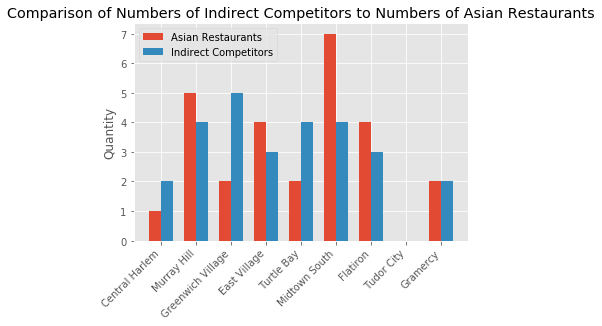

In [170]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

N = 9
asian_restaurants = (1, 5, 2, 4, 2, 7, 4, 0, 2)
indirect_competitors = (2, 4, 5, 3, 4, 4, 3, 0, 2)

com = np.arange(N) 
width = 0.35       
plt.bar(com, asian_restaurants, width, label='Asian Restaurants')
plt.bar(com + width, indirect_competitors, width,
    label='Indirect Competitors')

plt.ylabel('Quantity')
plt.title('Comparison of Numbers of Indirect Competitors to Numbers of Asian Restaurants')

plt.xticks(com + width / 2, ('Central Harlem', 'Murray Hill', 'Greenwich Village', 'East Village', 'Turtle Bay', 'Midtown South', 'Flatiron', 'Tudor City', 'Gramercy'))
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

plt.legend(loc='best')
plt.show()